In [5]:
# Data management
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Graphics
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt

# Preprocessing and modelling
# ------------------------------------------------------------------------------
import skfuzzy as fuzz
import skfuzzy.membership as mf
from skfuzzy import control as ctrl

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
#warnings.filterwarnings('once')
warnings.filterwarnings('ignore')

In [6]:
# Generate universe variables
x = np.arange(0, 61, 1)
y = np.arange(0, 13, 1)
z  = np.arange(0, 6, 1)



In [7]:
# Generate fuzzy membership functions
x1 = fuzz.trapmf(x, [0, 0, 15, 30])
x2 = fuzz.trimf(x, [10, 30, 50])
x3 = fuzz.trapmf(x, [30, 40, 60, 60])



y1 = fuzz.trimf(y, [0, 0, 4])
y2 = fuzz.trimf(y, [2, 6, 12])
y3 = fuzz.trimf(y, [8, 12, 12])



z1 = fuzz.trimf(z, [0, 0, 2])
z2 = fuzz.trimf(z, [1, 3, 5])
z3 = fuzz.trimf(z, [2, 5, 5])




character	color
‘b’	blue
‘g’	green
‘r’	red
‘c’	cyan
‘m’	magenta
‘y’	yellow
‘k’	black
‘w’	white

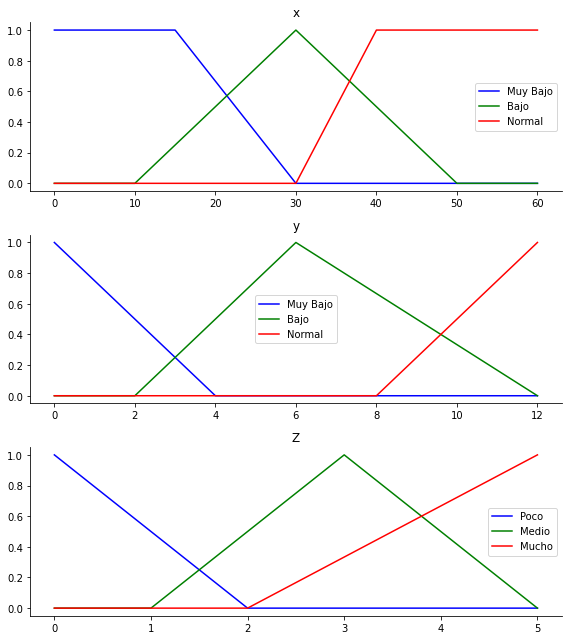

In [8]:
# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x, x1, 'b', linewidth=1.5, label='Muy Bajo')
ax0.plot(x, x2, 'g', linewidth=1.5, label='Bajo')
ax0.plot(x, x3, 'r', linewidth=1.5, label='Normal')
ax0.set_title('x')
ax0.legend()

ax1.plot(y, y1, 'b', linewidth=1.5, label='Muy Bajo')
ax1.plot(y, y2, 'g', linewidth=1.5, label='Bajo')
ax1.plot(y, y3, 'r', linewidth=1.5, label='Normal')
ax1.set_title('y')
ax1.legend()

ax2.plot(z, z1, 'b', linewidth=1.5, label='Poco')
ax2.plot(z, z2, 'g', linewidth=1.5, label='Medio')
ax2.plot(z, z3, 'r', linewidth=1.5, label='Mucho')
ax2.set_title('Z')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [9]:
#What would the tip be in the following circumstance:

#FACTS

#Food quality was 6.5
#Service was 9.8

x_obs=45
y_obs=10

In [10]:
# FUZZIFICATION INPUT REAL VALUES 

# We need the activation of our fuzzy membership functions at these values.

x1_gp = fuzz.interp_membership( np.arange(0, 61, 1), x1, x_obs)
x2_gp = fuzz.interp_membership( np.arange(0, 61, 1), x2, x_obs)
x3_gp = fuzz.interp_membership( np.arange(0, 61, 1), x3, x_obs)

y1_gp = fuzz.interp_membership( np.arange(0, 13, 1), y1, y_obs)
y2_gp = fuzz.interp_membership( np.arange(0, 13, 1), y2, y_obs)
y3_gp = fuzz.interp_membership( np.arange(0, 13, 1), y3, y_obs)




In [11]:
# RULE ACTIVATION

# Now we take our rules and apply them. Rule 1 concerns bad food OR service.
# The OR operator means we take the maximum of these two.
active_rule1 = np.fmin(x1_gp, y1_gp)

# Now we apply this by clipping the top off the corresponding output
# membership function with `np.fmin`
y_R1 = np.fmin(active_rule1, z1)  # removed entirely to 0


active_rule2 = np.fmin(x1_gp, y3_gp)
y_R2 = np.fmin(active_rule2, z2)  # removed entirely to 0

active_rule3 = np.fmin(x2_gp, y2_gp)
y_R3 = np.fmin(active_rule3, z2)  # removed entirely to 0

active_rule4 = np.fmin(x2_gp, y3_gp)
y_R4 = np.fmin(active_rule4, z3)  # removed entirely to 0

active_rule5 = np.fmin(x3_gp, y1_gp)
y_R5 = np.fmin(active_rule5, z1)  # removed entirely to 0


# For rule 2 we connect acceptable service to medium tipping
#y_activation_md = np.fmin(x2_gp_mb, y_poco)

# For rule 3 we connect high service OR high food with high tipping
#active_rule3 = np.fmax(qual_level_hi, serv_level_hi)
#tip_activation_hi = np.fmin(active_rule3, tip_hi)
z0 = np.zeros_like(z)

In [16]:
y_R1


array([0., 0., 0., 0., 0., 0.])

In [18]:
z1

array([1. , 0.5, 0. , 0. , 0. , 0. ])

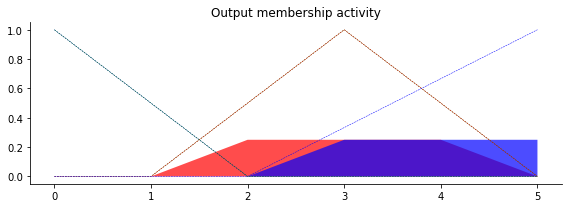

In [21]:
# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(z, z0, y_R1, facecolor='b', alpha=0.7)
ax0.plot(z, z1, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(z, z0, y_R2, facecolor='g', alpha=0.7)
ax0.plot(z, z2, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(z, z0, y_R3, facecolor='r', alpha=0.7)
ax0.plot(z, z2, 'r', linewidth=0.5, linestyle='--')
#ax0.set_title('Output membership activity')

ax0.fill_between(z, z0, y_R4, facecolor='b', alpha=0.7)
ax0.plot(z, z3, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(z, z0, y_R5, facecolor='g', alpha=0.7)
ax0.plot(z, z1, 'g', linewidth=0.5, linestyle='--')

ax0.set_title('Output membership activity')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [22]:
# FUZZY OUTPUT

# Aggregate all three output membership functions together
aggregated = np.fmax(y_R1, 
                             np.fmax(y_R5, 
                                     np.fmax(y_R4, 
                                             np.fmax(y_R2, y_R3))))



Controls which defuzzification method will be used. 
* ‘centroid’: Centroid of area 
* ‘bisector’: bisector of area 
* ‘mom’ : mean of maximum 
* ‘som’ : min of maximum 
* ‘lom’ : max of maximum

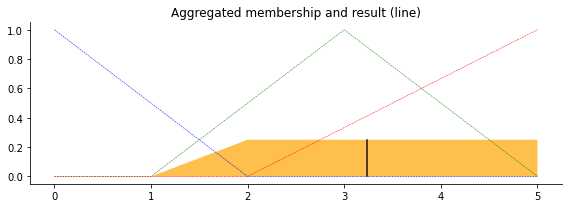

In [23]:
# DEFUZZIFICATION


# Calculate defuzzified result
output = fuzz.defuzz(z, aggregated, 'centroid')
output_activation = fuzz.interp_membership(z, aggregated, output)  # for plot

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(z, z1, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(z, z2, 'g', linewidth=0.5, linestyle='--')
ax0.plot(z, z3, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(z, z0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([output, output], [0, output_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [24]:
print(" TIP resulting", output)

 TIP resulting 3.2380952380952377
